# 인공 신경망(Aritificial Neural Network)
---
## 1. 퍼셉트론(Perceptron)
퍼셉트론은 활성화함수로 계단함수사용 -> 계단함수는 비선형 함수 -> 선형함수를 활성화함수로 쓰인다면 단층 신경망으로 표현가능.신경망의 층 깊게하는 의미 없어짐(복잡한 표현 가능x)
## 2. XOR 문제
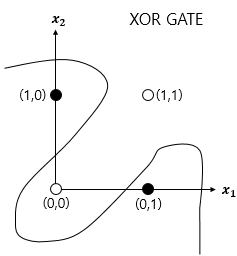
### 1. 파이토치로 단층 퍼셉트론 구현하기

In [5]:
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2,1,bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device) #이진 분류에서 사용하는 크로스엔트로피 함수
optimizer = torch.optim.SGD(model.parameters(),lr=1)

for step in range(1001):
    optimizer.zero_grad() #pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문
    hypothesis = model(X)
    
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print('step:{} cost:{}'.format(step,cost.item()))


step:0 cost:0.7273974418640137
step:100 cost:0.6931475400924683
step:200 cost:0.6931471824645996
step:300 cost:0.6931471824645996
step:400 cost:0.6931471824645996
step:500 cost:0.6931471824645996
step:600 cost:0.6931471824645996
step:700 cost:0.6931471824645996
step:800 cost:0.6931471824645996
step:900 cost:0.6931471824645996
step:1000 cost:0.6931471824645996


### 2. 학습된 단층 퍼셉트론의 예측값 확인하기

In [14]:
with torch.no_grad(): #  autograd x
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis):\n', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted):\n ', predicted.detach().cpu().numpy())
    print('실제값(Y):\n', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):
  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


### 3. 파이토치로 다층 퍼셉트론 구현하기

In [17]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=1)

for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print('epoch:{},cost:{}'.format(epoch,cost))

epoch:0,cost:0.705255389213562
epoch:100,cost:0.6931418180465698
epoch:200,cost:0.6931371688842773
epoch:300,cost:0.6931324005126953
epoch:400,cost:0.6931275129318237
epoch:500,cost:0.6931223273277283
epoch:600,cost:0.6931167840957642
epoch:700,cost:0.6931108236312866
epoch:800,cost:0.6931042671203613
epoch:900,cost:0.6930971145629883
epoch:1000,cost:0.6930890083312988
epoch:1100,cost:0.693079948425293
epoch:1200,cost:0.6930696964263916
epoch:1300,cost:0.6930577754974365
epoch:1400,cost:0.6930438280105591
epoch:1500,cost:0.6930274367332458
epoch:1600,cost:0.6930077075958252
epoch:1700,cost:0.6929837465286255
epoch:1800,cost:0.6929539442062378
epoch:1900,cost:0.6929163932800293
epoch:2000,cost:0.6928679943084717
epoch:2100,cost:0.692803680896759
epoch:2200,cost:0.6927158832550049
epoch:2300,cost:0.69259113073349
epoch:2400,cost:0.6924046277999878
epoch:2500,cost:0.6921080350875854
epoch:2600,cost:0.6915925145149231
epoch:2700,cost:0.6905767917633057
epoch:2800,cost:0.6881387233734131
ep

### 4. 학습된 다층 퍼셉트론의 예측값 확인하기

In [18]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis):\n', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted):\n', predicted.detach().cpu().numpy())
    print('실제값(Y):\n', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):
 [[7.5269883e-05]
 [9.9989927e-01]
 [9.9989188e-01]
 [1.2472055e-04]]
모델의 예측값(Predicted):
 [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## 3. 비선형 활성화 함수(Activation function)
### 1. 활성화 함수의 특징 - 비선형 함수(Nonlinear function)
선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다.
### 2. 시그모이드 함수(Sigmoid function)와 기울기 소실
시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생

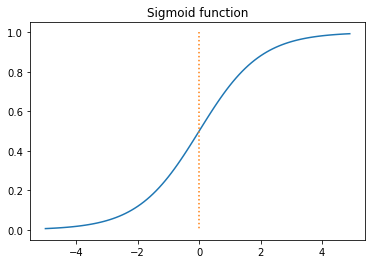

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid function')
plt.show()

역전파 과정에서 0에 가까운 기울기가 곱해지게 되면, 앞단에 기울기가 잘 전달되지 않게 된다.</br>
이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 한다. 즉, 가중치가 업데이트 되지 않아 학습이 되지 않는다는 뜻이다.  
따라서 시그모이드 함수를 은닉층에서 사용하는 것은 지양된다.
### 3. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)
하이퍼볼릭탄젠트 함수는 0을 중심으로 하여 시그모이드 함수보다 범위가 넓어 기울기 소실 증상이 적다.

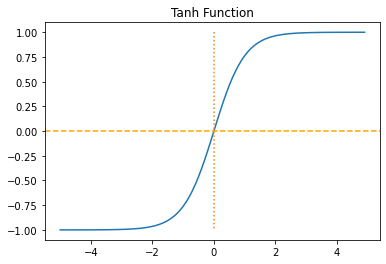

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

### 4. 렐루 함수(ReLU)
렐루 함수는 특정 양수 값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동한다. 또한 다른 활성화 함수에 비해 연산 속도도 빠르다.  
하지만 입력값이 음수일 때 기울기가 0이되는 문제점이 있다.

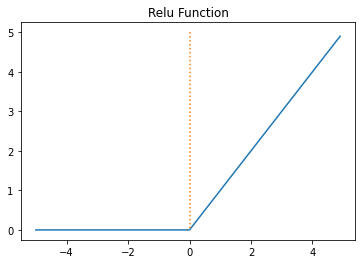

In [22]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

### 5. 리키 렐루(Leaky ReLU)
Leaky ReLU는 입력값이 음수일 경우 매우 작은 수를 반환하게 하여 기울기가 0이 되지 않게 해준다.

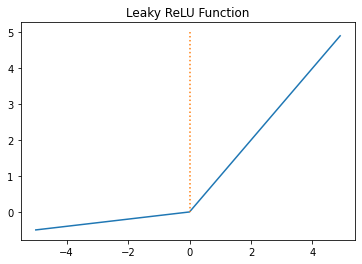

In [23]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

### 6. 소프트맥스 함수(Softmax function)
소프트맥스 함수는 출력층의 뉴런에서 주로 사용되고 특히 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용된다.

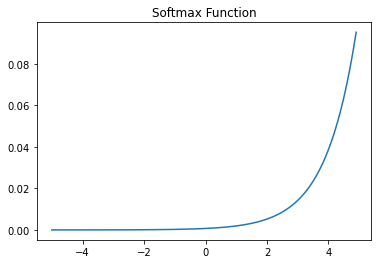

In [25]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## 4. 다층 퍼셉트론으로 손글씨 분류하기

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits() #사이킷런 패키지에서 제공하는 손글씨 이미지 데이터

In [32]:
print(digits.images[0]) # 첫번째 샘플

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [33]:
print(digits.target[0]) # 첫번째 샘플의 레이블

0


In [34]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


0 번 인덱스 샘플의 레이블 : 0
1 번 인덱스 샘플의 레이블 : 1
2 번 인덱스 샘플의 레이블 : 2
3 번 인덱스 샘플의 레이블 : 3
4 번 인덱스 샘플의 레이블 : 4


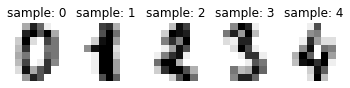

In [52]:
images_and_labels = list(zip(digits.images,digits.target))

for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플 출력
    plt.subplot(1,5,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('sample: %d' %label)

for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 :',digits.target[i])

In [71]:
print(digits.data[0]) # 8*8 행렬의 이미지 샘플을 1*8 행렬로 reshape한 데이터

X = digits.data # 이미지
Y = digits.target # 이미지에 대한 레이블

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Epoch    0/100 Cost: 2.542127
Epoch   10/100 Cost: 2.021585
Epoch   20/100 Cost: 1.718197
Epoch   30/100 Cost: 1.348234
Epoch   40/100 Cost: 0.983505
Epoch   50/100 Cost: 0.693503
Epoch   60/100 Cost: 0.500640
Epoch   70/100 Cost: 0.377824
Epoch   80/100 Cost: 0.298326
Epoch   90/100 Cost: 0.245365


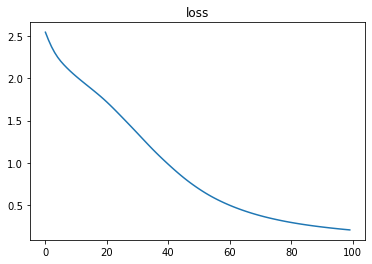

In [59]:
import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss() # 소프트맥스 함수를 포함한다.

optimizer = optim.Adam(model.parameters())

losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred,Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
    losses.append(loss.item())
    
plt.title('loss')
plt.plot(losses)

## 5. 과적합(Overfitting)을 막는 방법들
### 1. 데이터의 양을 늘리기
* 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습 
* 데이터의 양이 적을 경우 기존의 데이터를 조금씩 변형하고 추가하는 방식인 데이터 증식을 사용

### 2. 모델의 복잡도 줄이기
* ANN의 복잡도는 은닉층의 수나 매개변수의 수로 결정되므로 과적합 현상이 포착되었을 때, 인공 신경망의 복잡도를 줄이는 방법도 있다.

### 3. 가중치 감소(weight decay)
* 가중치 값이 커지게 될 수록 학습데이터에 영향을 많이 받게 되고, 학습데이터에 모델이 맞춰지게 됨.
* 가중치들의 값이 증가하는 것을 제한함으로써 Overfitting 방지

### 4. 드롭아웃(Dropout)
* 학습 과정에서 신경망의 일부를 사용하지 않는 방법
* ANN이 특정 뉴런에 의존적인것 방지해준다.